In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# Part a

def nChooseK(n,k):
    return math.factorial(n) / (math.factorial(k) * math.factorial(n-k))

In [3]:
def bernoulliDist(n,k,p):
    return nChooseK(n,k)*(p**k)*((1-p)**(n-k))

In [4]:
x = np.arange(0, 1.001, 0.001)
likelihood_lang = bernoulliDist(869, 103, x)
likelihood_notlang = bernoulliDist(2353, 199, x)

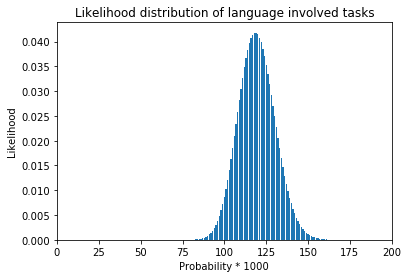

In [5]:
index = np.arange(0,1001)
plt.xlim(0,200)
plt.bar(index, likelihood_lang)
plt.xlabel('Probability * 1000')
plt.ylabel('Likelihood')
plt.title('Likelihood distribution of language involved tasks')
plt.show(block = False)

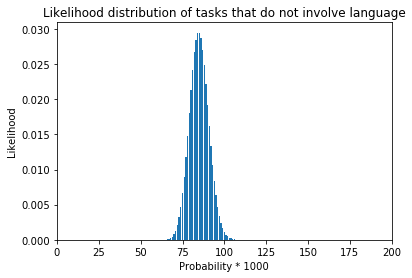

In [6]:
plt.xlim(0,200)
plt.bar(index, likelihood_notlang)
plt.xlabel('Probability * 1000')
plt.ylabel('Likelihood')
plt.title('Likelihood distribution of tasks that do not involve language')
plt.show(block = False)

In [7]:
# Part b

max_l = np.amax(likelihood_lang)
max_nl = np.amax(likelihood_notlang)

max_l_prob = 0
max_nl_prob = 0
for i in range(len(likelihood_lang)):
    if (likelihood_lang[i] == max_l):
        #Dividing the i by 1000 since the probability is scaled by 1000.
        max_l_prob = i/1000
    
    if (likelihood_notlang[i] == max_nl):
        max_nl_prob = i/1000
    
print('The probability that maximizes the likelihood of language involving tasks: (probability, likelihood of that probability)')
print(max_l_prob, max_l)
print('The probability that maximizes the likelihood of not language involving tasks: (probability, likelihood of that probability)')
print(max_nl_prob, max_nl)

The probability that maximizes the likelihood of language involving tasks: (probability, likelihood of that probability)
0.119 0.0417952478261316
The probability that maximizes the likelihood of not language involving tasks: (probability, likelihood of that probability)
0.085 0.02946375315559796


In [8]:
# Part c

# x has 1001 values, and since it is given that uniformly distributed, prior P(X) = 1/1001
prior = 1/1001

normalizer_l = 0
posterior_l = np.zeros(len(likelihood_lang))
normalizer_nl = 0
posterior_nl = np.zeros(len(likelihood_notlang))

for i in range(len(likelihood_lang)):
    normalizer_l += likelihood_lang[i] * prior
    normalizer_nl += likelihood_notlang[i] * prior

posterior_l[:] = likelihood_lang[:] * prior / normalizer_l
posterior_nl[:] = likelihood_notlang[:] * prior / normalizer_nl

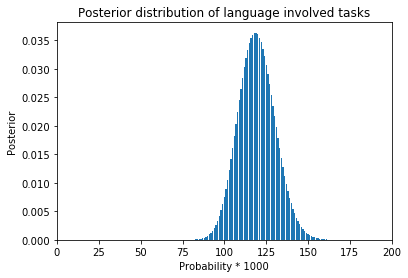

In [9]:
plt.xlim(0,200)
plt.bar(index, posterior_l)
plt.xlabel('Probability * 1000')
plt.ylabel('Posterior')
plt.title('Posterior distribution of language involved tasks')
plt.show(block = False)

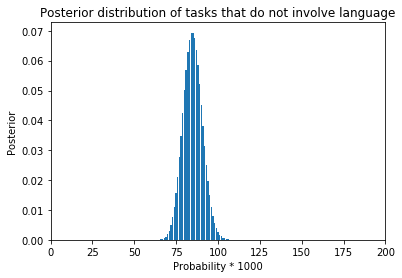

In [10]:
plt.xlim(0,200)
plt.bar(index, posterior_nl)
plt.xlabel('Probability * 1000')
plt.ylabel('Posterior')
plt.title('Posterior distribution of tasks that do not involve language')
plt.show(block = False)

In [11]:
def pdf_to_cdf(posterior):
    lowerbound = 0
    temp_min = 0
    upperbound = np.inf
    temp_max = np.inf
    cdf = np.zeros(len(posterior) + 1)
    for i in range(1, len(posterior) +1):
        for j in range(i):
            cdf[i] += posterior[j]
            # Since i have iterated i by 1, when finding lowerbound and upperbound, i decrease 1 from i.
        if (cdf[i] >= 0.025 and lowerbound <= temp_min):
            temp_min = cdf[i]
            lowerbound = (i-1)/1000
        if (cdf[i] >= 0.975 and upperbound >= temp_max):
            temp_max = cdf[i]
            upperbound = (i-1)/1000
    return cdf,lowerbound, upperbound

cdf_l,lower_l, upper_l = pdf_to_cdf(posterior_l)
cdf_nl, lower_nl, upper_nl = pdf_to_cdf(posterior_nl)

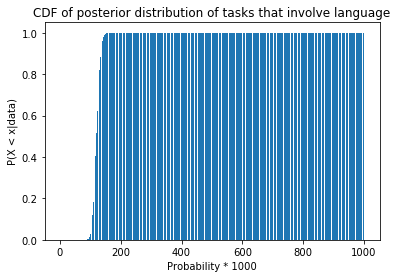

In [12]:
index2 = np.arange(0,1002)
plt.bar(index2, cdf_l)
plt.xlabel('Probability * 1000')
plt.ylabel('P(X < x|data)')
plt.title('CDF of posterior distribution of tasks that involve language')
plt.show(block = False)

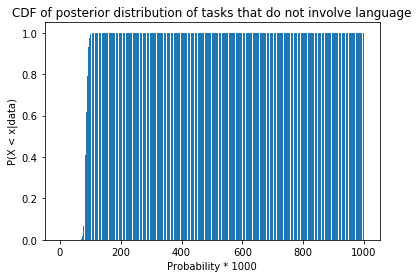

In [13]:
plt.bar(index2, cdf_nl)
plt.xlabel('Probability * 1000')
plt.ylabel('P(X < x|data)')
plt.title('CDF of posterior distribution of tasks that do not involve language')
plt.show(block = False)

In [14]:
print('Confidence interval of x_l is (', lower_l, ',', upper_l, ')' )
print('Confidence interval of x_nl is (', lower_nl, ',', upper_nl, ')' )

Confidence interval of x_l is ( 0.099 , 0.142 )
Confidence interval of x_nl is ( 0.074 , 0.096 )


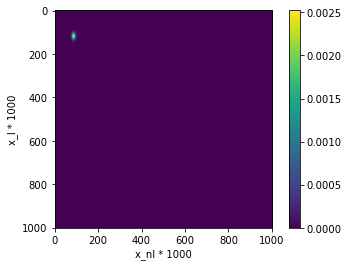

In [15]:
# Part d

matrixPosterior_l  = np.matrix(posterior_l)
matrixPosterior_nl = np.matrix(posterior_nl)
joint_dist = (matrixPosterior_l.T).dot(matrixPosterior_nl)

plt.imshow(joint_dist)
plt.xlabel('x_nl * 1000')
plt.ylabel('x_l * 1000')
plt.colorbar()
plt.show(block = False)

In [16]:
x_l_greater = 0
x_l_notgreater = 0
for i in range(len(joint_dist)):
    for j in range(len(joint_dist)):
        if ( i > j ):
            x_l_greater += joint_dist[i,j]
        else:
            x_l_notgreater += joint_dist[i,j]

print('Sum of posteriors such that x_l > x_nl')
print(x_l_greater)
print('Sum of posteriors such that x_l <= x_nl')
print(x_l_notgreater)

Sum of posteriors such that x_l > x_nl
0.9978520275861253
Sum of posteriors such that x_l <= x_nl
0.002147972413864104


In [17]:
# Part e

PROB_LANG = 0.5

prob_lang_active = ( max_l_prob * PROB_LANG ) / ( ( max_l_prob * PROB_LANG ) + max_nl_prob * (1 - PROB_LANG) )
print('P(language | activation) is :')
print(prob_lang_active)


P(language | activation) is :
0.5833333333333333
